<a href="https://colab.research.google.com/github/R-Owino/HYPOTHYROIDISM-PREDICTION-IN-PATIENTS/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_04_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Predicting hypothyroidism in patients based on symptoms.

## 1. Defining the Question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success
Conduct decision trees and SVM techniques for prrediction and choose the most favourable one. 

### c) Understanding the context 
Hypothyroidism is a common condition where the thyroid doesn't create and release enough thyroid hormone into a person's bloodstream. This makes the person's metabolism slow down. Also called underactive thyroid, hypothyroidism can make a person feel tired, gain weight and be unable to tolerate cold temperatures. Predicting whether or not a patient has hypothyroidism can help in reversing the trajectory of the thyroid disease, improve the symptoms and avoid lifelong consequences.  

### d) Recording the Experimental Design
- Load and read the dataset. 
- Perform EDA.
- Implement the solution using random forests.
- Challenge the solution using SVM technique.

### e) Data Relevance

## 2. Reading the Data

In [146]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('All libraries are imported')

All libraries are imported


In [147]:
# Loading the Dataset
url = 'https://drive.google.com/file/d/16JjcwAmu2_bHNtb0ZdkOaJ_QW1lD88HK/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id='+ file_id
df = pd.read_csv(dwn_url)
df.columns = df.columns.str.lower()

## 3. Checking the Data

In [148]:
# Determining the no. of records in our dataset
print('There are ' +str(df.shape[0])+ ' rows and ' +str(df.shape[1])+ ' columns in the dataset')

There are 3163 rows and 26 columns in the dataset


In [149]:
# Previewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [150]:
# Previewing the bottom of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [151]:
# Checking whether each column has an appropriate datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
tbg                          object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [152]:
# Identifying the Missing Data
print('There are ' + str(df.isnull().sum().sum()) + ' missing values in the dataset')

There are 0 missing values in the dataset


In [153]:
# unique column values in the dataset
for col in df:
  print(df[col].unique())
  print('\n')

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

There are no missing data but there are ? symbols instead. To perform more operations on our data, the ? symbols need to be replaced appropriately in the respective columns.

Because all the columns are in string datatype, I will first replace the ? with 0 then fill them appropriately after changing the datatypes.

In [154]:
# replacing ? with 0 in the numerical columns
df[['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']] = df[['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']].replace(['?'],'0')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,0


A research from [this](https://https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5058901/#:~:text=Our%20results%20confirmed%20that%20females,hypothyroidism%20and%20hyperthyroidism%20than%20males.) source reveals that hypothyroidism is common in females more than in males. Therefore, the ? symbol in the sex column will be replaced with F. But, because we don't want to replace wrongly, we will first check against the pregnant column to be sure.

In [155]:
print(df.loc[df['pregnant'] == 't', 'sex'].to_markdown())

# the results below show that we have an instance of a pregnant person with unknown gender
# so we can go ahead and fill all the ? symbols with F

|      | sex   |
|-----:|:------|
|  120 | F     |
|  171 | F     |
|  248 | F     |
|  273 | F     |
|  398 | F     |
|  429 | F     |
|  430 | F     |
|  484 | F     |
|  544 | F     |
|  615 | F     |
|  720 | F     |
|  725 | F     |
|  809 | F     |
|  876 | F     |
|  970 | F     |
| 1001 | F     |
| 1052 | F     |
| 1152 | F     |
| 1219 | F     |
| 1222 | F     |
| 1258 | F     |
| 1282 | F     |
| 1362 | F     |
| 1368 | F     |
| 1449 | F     |
| 1468 | F     |
| 1523 | F     |
| 1539 | F     |
| 1561 | F     |
| 1572 | F     |
| 1579 | F     |
| 1584 | F     |
| 1588 | F     |
| 1643 | F     |
| 1662 | F     |
| 1691 | F     |
| 1697 | F     |
| 1701 | F     |
| 1799 | F     |
| 1926 | F     |
| 1954 | F     |
| 1963 | F     |
| 2058 | F     |
| 2124 | F     |
| 2156 | F     |
| 2160 | F     |
| 2181 | F     |
| 2218 | F     |
| 2249 | F     |
| 2358 | F     |
| 2362 | F     |
| 2520 | F     |
| 2554 | F     |
| 2580 | F     |
| 2737 | F     |
| 2798 | F     |
| 2826 | F    

In [156]:
# replacing the ? symbol in the sex column
df['sex'] = df['sex'].replace(['?'],'F')

Now that we have the columns with appropriate datatypes, we can fill the 0 age values with the median.

In [172]:
# changing numerical column datatypes to int/float
df[['tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']] = df[['tsh', 't3', 'tt4', 't4u', 'fti', 'tbg']].astype(float)
df['age'] = df['age'].astype(int)

In [173]:
df['age'].replace(0, df['age'].median())

0       72
1       15
2       24
3       24
4       77
        ..
3158    58
3159    29
3160    77
3161    74
3162    56
Name: age, Length: 3163, dtype: int64

In [174]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0


In [175]:
df.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

In [185]:
# Checking for Outliers
def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(15,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = df[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


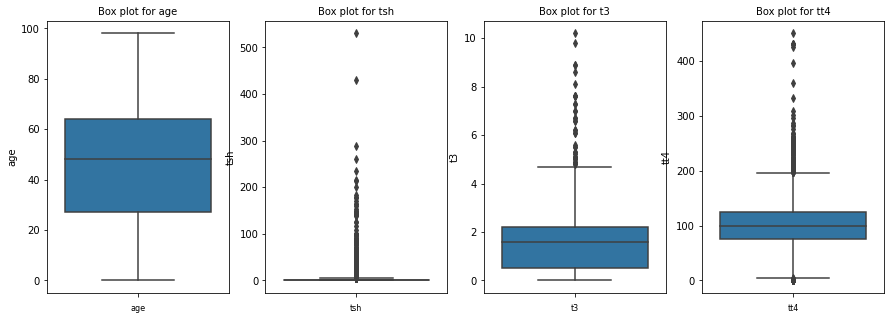

In [186]:
col_names = ['age', 'tsh', 't3', 'tt4']
box(col_names)

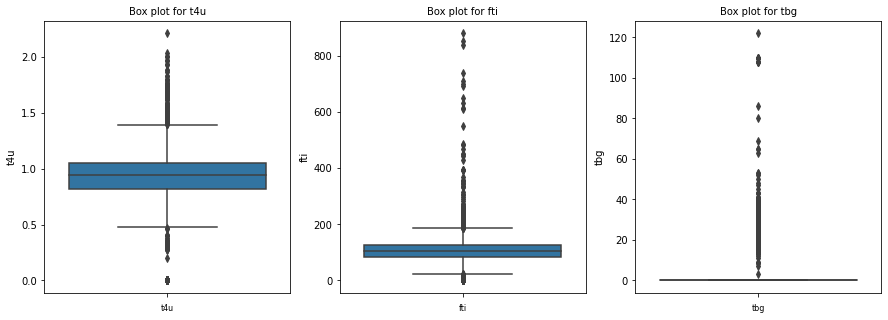

In [188]:
col_names = ['t4u', 'fti', 'tbg']
box(col_names)

Except age, most of the numeric columns have outliers. These will be removed during the challenge the solution part.

In [ ]:
# Checking for Anomalies


In [ ]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?